# Perceptron
Building a simple Perceptron to fit a OR, AND and XOR Gate


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

Define the class for Perceptron

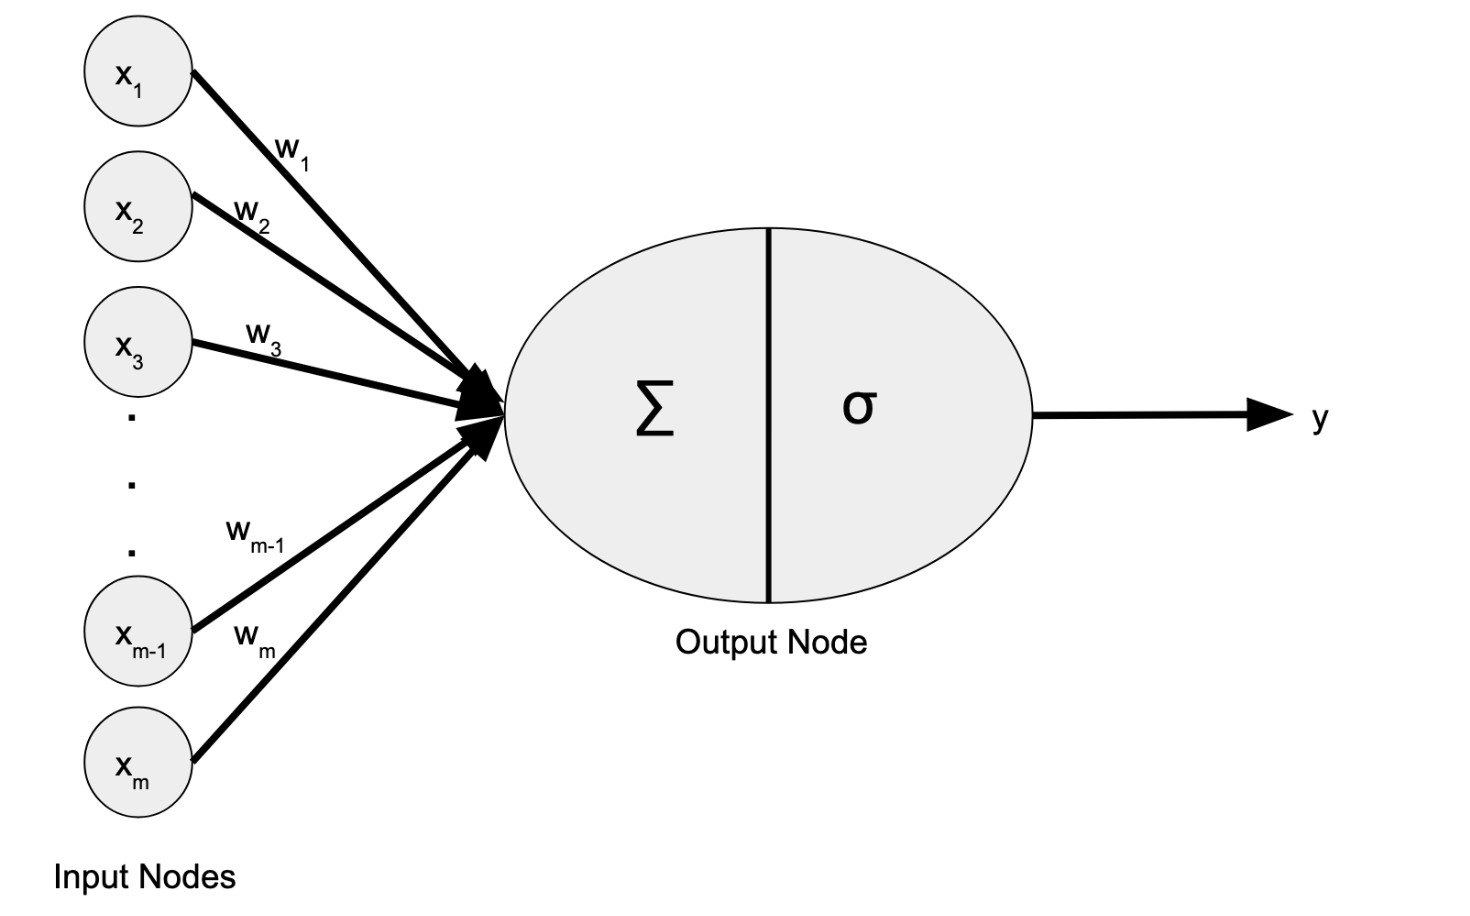

In [3]:
import pandas as pd
import numpy as np

#trying out few things in numpy
def func(x):
    return np.where(x > 0, 1, 0)
        
data = {"x1": [0,0,1,1], "x2": [0,1,0,1]}
data_y = pd.Series([0,0,0,1])
w = np.array([2, 2])
x_df = pd.DataFrame(data)
x = np.array(x_df)
z = np.dot(x, w.T)
y_pred = func(z)
y = np.array(data_y)
print(x)
print(y)
print(y_pred)
print(2 * np.mean(y_pred-y))

print(np.mean(z))
print(np.mean(x, axis=0))

[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0 0 0 1]
[0 1 1 1]
1.0
2.0
[0.5 0.5]


In [4]:
class Perceptron:
  def __init__(self, eta, epochs, verbose=0):
    self.eta = eta
    self.epochs = epochs
    self.verbose = verbose

  def activationFunction(self, z): # binary activation function
    a = 1/(1 + np.exp(-z)) # sigma
    return np.where(a > 0.5, 1, 0)
  
  def derivativeFunction(self, z):
    return np.exp(-z)/((1 + np.exp(-z)) ** 2)

  def linearFunction(self, inputs, weights, bias):
    z = np.dot(inputs, weights.T)  # [3, -4, 1] -> sigma([3, -4, 1]) = [1, 0, 1]
    z = z + bias
    if self.verbose > 3:
      print(f"z is:\n{z}")
    return z
  
  def lossFunction(self, ypred, y):
    return np.mean(ypred - y)

  def fit(self, X, y):

    self.X = X.to_numpy()
    self.y = np.array([y])
    self.weights = np.random.randn(np.shape(X)[1]) * 1e-4
    self.bias = -np.ones((1, 1))     

    if self.verbose > 3:
      print("shape(X, Y, weights, bias)", 
            np.shape(X), np.shape(self.y), 
            np.shape(self.weights), np.shape(self.bias))
      
    for epoch in range(self.epochs):
      if self.verbose > 0:
        print(f"for epoch: {epoch}")
        
      z = self.linearFunction(X, self.weights, self.bias)
      y_hat = self.activationFunction(z) # forward pass
      
      if self.verbose > 3:
        print(f"predicted value: \n{y_hat}")
        print(f"actual value: \n{self.y}")
      
      mean_error = np.mean( (y_hat-self.y) ** 2)
      if self.verbose > 3:
        print(f"error: \n{mean_error}")
      if self.verbose > 0:
        print(f"mean-error: \n{mean_error}")
      delta = self.eta * np.mean(y_hat-self.y) * np.mean(self.derivativeFunction(z)) * (np.mean(self.X, axis=0)/np.shape(self.X)[0])
      if self.verbose > 0:
        print(delta)
      self.weights = self.weights -  delta # "backwards pass"
      self.bias = self.bias - self.eta * np.mean(y_hat-self.y) * np.mean(self.derivativeFunction(z))
      if self.verbose > 3:
        print(f"updated weights: \n{self.weights}")
        print(f"updated bias: \n{self.bias}")
      
      if self.verbose > 0:
        print("#############\n")

  def predict(self, X):
    return self.activationFunction(self.linearFunction(X, self.weights, self.bias))

Quick Summary on AND, OR, XOR Operations: [AND, OR, XOR Bitwise Operations](https://krissparks.medium.com/and-or-xor-bitwise-operators-2ae3fbcfa5bc)

# AND Operation:

In [30]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [32]:
AND_X = AND.drop("y", axis=1)

AND_Y = AND['y']
AND_Y = AND_Y.to_frame()

print(AND_X)
print(AND_Y)

   x1  x2
0   0   0
1   0   1
2   1   0
3   1   1
   y
0  0
1  0
2  0
3  1


In [33]:
and_model = Perceptron(eta = 0.5, epochs=50)
and_model.fit(AND_X,AND_Y)
print("Y_pred", and_model.predict(AND_X))
print("Y", AND_Y)

print("weights", and_model.weights)
print("bias", and_model.bias)

Y_pred [[0 0 0 1]]
Y    y
0  0
1  0
2  0
3  1
weights [0.10291656 0.10310945]
bias [[-0.1756731]]


# OR Operation

In [19]:
OR_data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(OR_data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [22]:
OR_X = OR.drop("y", axis=1)

OR_Y = OR['y']
OR_Y = OR_Y.to_frame()

print("X", OR_X, "\n", "Y", OR_Y)

X    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1 
 Y    y
0  0
1  1
2  1
3  1


In [24]:
OR_model = Perceptron(eta = 0.5, epochs=50)
OR_model.fit(OR_X,OR_Y)
print("Y_pred", OR_model.predict(OR_X))
print("Y", OR_Y)

print("weights", OR_model.weights)
print("bias", OR_model.bias)

Y_pred [[0 1 1 1]]
Y    y
0  0
1  1
2  1
3  1
weights [0.11371323 0.11381311]
bias [[-0.08975292]]


# XOR operation

In [25]:
XOR_data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [1,0,0,1]}

XOR = pd.DataFrame(XOR_data)
XOR

,x1,x2,y
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,1


In [26]:
XOR_X = XOR.drop("y", axis=1)

XOR_Y = XOR['y']
XOR_Y = XOR_Y.to_frame()

print("X", XOR_X, "\n", "Y", XOR_Y)

X    x1  x2
0   0   0
1   0   1
2   1   0
3   1   1 
 Y    y
0  1
1  0
2  0
3  1


In [27]:
XOR_model = Perceptron(eta = 0.5, epochs=50)
XOR_model.fit(XOR_X,XOR_Y)
print("Y_pred", XOR_model.predict(XOR_X))
print("Y", XOR_Y)

print("weights", XOR_model.weights)
print("bias", XOR_model.bias)

Y_pred [[0 0 0 1]]
Y    y
0  1
1  0
2  0
3  1
weights [0.11034947 0.11027021]
bias [[-0.11695802]]


# Conclusion:
Here we can see Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. But in the case of XOR it couldn't classify correctly because it was a non-linear problem. Lets see graphically.

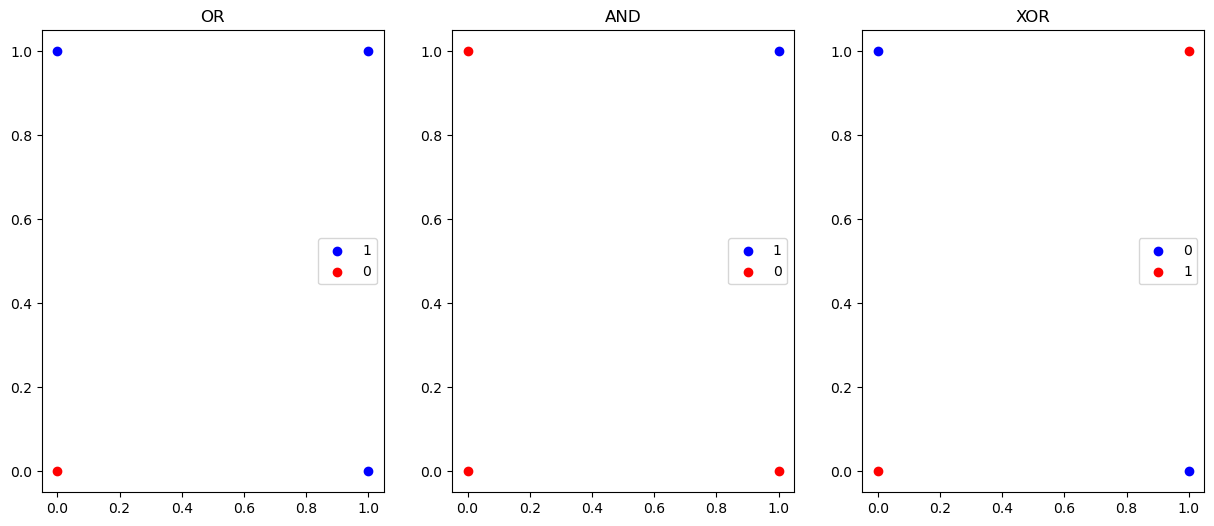

In [54]:
import matplotlib.pyplot as plt

(fig, (axs1, axs2, axs3)) = plt.subplots(1, 3, figsize=(15, 6))

x_or = OR_X.to_numpy()
y_or = OR_Y.to_numpy()[:,0]
axs1.scatter(x_or[y_or == 1,0],x_or[y_or == 1,1], c = 'b', label = "1")
axs1.scatter(x_or[y_or == 0,0],x_or[y_or == 0,1], c = 'r', label = "0")
axs1.legend()
axs1.set_title("OR")


x_and = AND_X.to_numpy()
y_and = AND_Y.to_numpy()[:,0]

axs2.scatter(x_and[y_and == 1,0],x_and[y_and == 1,1], c = 'b', label = "1")
axs2.scatter(x_and[y_and == 0,0],x_and[y_and == 0,1], c = 'r', label = "0")
axs2.legend()
axs2.set_title("AND")

x_xor = XOR_X.to_numpy()
y_xor = XOR_Y.to_numpy()[:,0]

axs3.scatter(x_xor[y_xor == 0,0],x_xor[y_xor == 0,1], c = 'b', label = "0")
axs3.scatter(x_xor[y_xor == 1,0],x_xor[y_xor == 1,1], c = 'r', label = "1")
axs3.legend()
axs3.set_title("XOR")

plt.show()

Would an MLP do better? let's see.The official documentation on sklearn is https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [44]:
# use scikit learn to work with MLPs
# import MLPClassifier
from sklearn.neural_network import MLPClassifier

## Fit an MLPClassifier on these data,
## can it separate them?
mlp = MLPClassifier(hidden_layer_sizes=(25,) # 1 hidden layer with 25 neurons
                    ,activation='relu'
                    ,solver='adam'
                    ,max_iter=10000)

mlp.fit(x_xor,y_xor)

pred = mlp.predict(x_xor)

print("prediction",pred)
print(sum(pred==y_xor)/len(y_xor))

prediction [1 0 0 1]
1.0
